# Treinando Modelo com KNN
O K-Nearest Neighbors (KNN) é um algoritmo de aprendizado supervisionado usado para classificação e regressão. Seu princípio é simples: dado um novo ponto, o algoritmo encontra os K pontos de treinamento mais próximos (vizinhos) e atribui a classe mais comum entre eles (ou faz a média, no caso de regressão).

In [227]:
#instalando lib para obter perfil de dados
!pip install ydata_profiling

## Importando bibliotecas

In [228]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from ydata_profiling import ProfileReport

## Dataset a ser utilizado
Vamos utilizar o dataset Iris
<br>**Objetivo:** O objetivo do dataset Iris é classificar flores da espécie "Iris" em três categorias com base em quatro características medidas. Ele é um exemplo de problema de classificação multiclasse.


**Tamanho do Conjunto de Dados:** O dataset contém 150 amostras, divididas igualmente entre três classes.

<p>Cada uma das classes tem 50 exemplos, temos três classes disponíves: As três classes de flores são:</p>

<br>**Iris-setosa**
<br>**Iris-versicolor**
<br>**Iris-virginica**
<br>Características (Features): Cada amostra tem quatro características numéricas:

<br>Comprimento da sépala (sepal length) - em centímetros.
<br>Largura da sépala (sepal width) - em centímetros.
<br>Comprimento da pétala (petal length) - em centímetros.
<br>Largura da pétala (petal width) - em centímetros.

In [229]:
from IPython.display import Image, display

image_url = "https://miro.medium.com/v2/resize:fit:828/format:webp/1*nfK3vGZkTa4GrO7yWpcS-Q.png"
display(Image(url=image_url, width=600))


## Carregando Dados


In [230]:
url_dados = 'https://raw.githubusercontent.com/suzanasvm/SistemasInteligentes/refs/heads/main/datasets/iris/iris.csv'

df = pd.read_csv(url_dados)
df.set_index('Id', inplace=True)

## Conhecendo os dados

In [231]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [232]:
#Vendo Exemplos diferentes
examples = df.groupby('Species').head(1)
examples.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
51,7.0,3.2,4.7,1.4,Iris-versicolor
101,6.3,3.3,6.0,2.5,Iris-virginica


## Limpeza dos dados
O dataset iris não possui nenhum caso de valores faltantes e nenhum tipo de ajuste e/ou limpeza é necessária.

Lembre-se que nem sempre isso acontece!
Caso o dataset utilizado necessite de limpezas e ajustes, esta etapa é importante de ser realizada!

In [233]:
profile  = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Separando features e labels: x e y
Você precisa se perguntar: Em quais colunas estão as características e qual coluna temos o nosso label classificador?

Neste caso a coluna species, possui a informação das especies possíveis.
E nas outras colunas possuimos as características

Informações para classificação:

$X$ = Features

$y$ = Labels (O que desejamos classificar)

In [234]:
#A variavel X, fica com todas as colunas, exceto a coluna species, que possui as classes (labels)
X = df.drop('Species', axis=1)
#A variavel y fica apenas com os labels classificadores
y = df['Species']

In [235]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [236]:
y

,Species
Id,
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
...,...
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


## Discretizando as classes  (Transformar Classes Categóricas em Valores Numéricos)
Antes de usarmos o algoritmo K-Nearest Neighbors (KNN), precisamos transformar as classes categóricas (nomes das flores) em valores numéricos. O KNN, assim como muitos outros algoritmos de aprendizado de máquina, funciona apenas com dados numéricos, ou seja, ele não consegue processar diretamente as classes representadas por strings (como Iris-setosa, Iris-versicolor, e Iris-virginica).

Para resolver isso, podemos utilizar uma técnica chamada label encoding, que transforma cada classe em um valor numérico.

Por que Discretizar?
Algoritmos como o KNN calculam distâncias entre os pontos de dados para realizar classificações. Essas distâncias são calculadas usando valores numéricos das características e dos rótulos, portanto, é essencial converter rótulos de texto em valores que o modelo possa entender. Ao codificar as classes de flores em números, garantimos que o algoritmo consiga comparar corretamente os rótulos e fazer as previsões.

In [237]:
# Discretizando as classes categóricas para valores numéricos
label_encoder = LabelEncoder()

# O valor de y, que anteriormente possuia os nomes das petalas, vai ser sobrescrito, com os valores discretizados
y = label_encoder.fit_transform(df['Species'])

# Mapeando os valores para sabermos quem é quem
mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

print(mapping)

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [238]:

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Separando features e labels

Você precisa se perguntar: Em quais colunas estão as características e qual coluna temos o nosso label classificador?
Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [255]:
#A variavel X, fica com todas as colunas, exceto a coluna species, que possui as classes (labels)
X = df.drop('Species', axis=1)
#A variavel y fica apenas com os labels classificadores
y = df['Species']

In [256]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [254]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Dividir os Dados em Treinamento e Teste
Dividir os dados em conjuntos de treino e teste é importante para garantir que um modelo de aprendizado de máquina possa generalizar bem para dados não vistos. <br>O conjunto de treino é usado para ajustar o modelo, enquanto o conjunto de teste avalia seu desempenho. Além disso, definir uma semente randômica durante a divisão assegura que os resultados sejam reprodutíveis, permitindo comparações consistentes entre diferentes execuções do modelo. Essa prática é essencial para validar a eficácia do modelo de maneira confiável.

In [239]:
#Divisao de treino 70% e teste 30%, semente randomica 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [240]:
#Features de Treino
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
82,5.5,2.4,3.7,1.0
134,6.3,2.8,5.1,1.5
138,6.4,3.1,5.5,1.8
76,6.6,3.0,4.4,1.4
110,7.2,3.6,6.1,2.5


In [241]:
#Labels de Treino (já discretizadas) representando as classes
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [242]:
#Features de Teste
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
74,6.1,2.8,4.7,1.2
19,5.7,3.8,1.7,0.3
119,7.7,2.6,6.9,2.3
79,6.0,2.9,4.5,1.5
77,6.8,2.8,4.8,1.4


In [243]:
#Labels de Teste (já discretizadas) representando as classes
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [260]:
print(f"Tamanho do dataframe {df.shape}")
print(f"Tamanho dos dados de treino {X_train.shape}")
print(f"Tamanho dos dados de teste {X_test.shape}")

Tamanho do dataframe (150, 5)
Tamanho dos dados de treino (105, 4)
Tamanho dos dados de teste (45, 4)


## Padronizando os Dados

<p>A padronização dos dados é um passo fundamental no processamento de informações, especialmente em algoritmos de aprendizado de máquina como o K-Nearest Neighbors (KNN). Quando os dados possuem escalas diferentes, variáveis que apresentam valores mais altos podem dominar a análise, distorcendo os resultados. Isso significa que as distâncias calculadas entre os pontos de dados podem não refletir a verdadeira similaridade entre eles.</p>

<p>Ao padronizar os dados, transformamos todas as variáveis para uma escala comum, garantindo que cada uma contribua de maneira justa para a análise. Isso permite que o modelo aprenda padrões de forma mais eficiente e precisa, levando a resultados mais confiáveis. Além disso, a padronização facilita a comparação entre diferentes conjuntos de dados e melhora a reprodutibilidade das análises.</p>

In [244]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

# Cria uma instância do StandardScaler para
# padronização dos dados.
scaler = StandardScaler()
# Calcula a média e o desvio padrão de X_train,
#e aplica a padronização a esses dados.
X_train_normalized = scaler.fit_transform(X_train)
# Aplica a padronização a X_test usando a média
#e o desvio padrão calculados a partir de X_train
X_test_normalized = scaler.transform(X_test)

In [245]:
# #Valores Normalizados
X_train_normalized[0]

array([-0.4134164 , -1.46440146, -0.10014569, -0.32149987])

## Treinando o modelo

In [246]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [247]:
#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos
#se quisermos alterar o k, basta passar o parametro
#n_neighbors= NOVO NUMERO DE K vizinhos
knn = KNeighborsClassifier()

In [248]:
#treinando o modelo com os dados de treino normalizados
knn.fit(X_train_normalized, y_train)

KNeighborsClassifier()

In [249]:
# Calcular a acurácia do modelo nos dados de treinamento
# Acurácia: Qual a taxa de acerto do modelo treinado?


acuracia_treinamento = knn.score(X_train_normalized, y_train)
print(f"Acurácia do modelo nos dados de treinamento: {acuracia_treinamento:.2f}")

Acurácia do modelo nos dados de treinamento: 0.95


## Avaliando o modelo
Agora que o modelo foi treinado, vamos observar como ele se sai com dados de teste, que são dados novos que ele nao conhece.

In [250]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_test_normalized)

In [251]:
#Predições do modelo
predito_knn

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [261]:
# Calcular a acurácia do modelo nos dados de treinamento
# Acurácia: Qual a taxa de acerto do modelo treinado?

accuracy = accuracy_score(y_test, predito_knn)
print(f"Acurácia do modelo KNN: {accuracy * 100:.2f}%")

Acurácia do modelo KNN: 100.00%


## Discussões sobre Avaliação do Modelo
Encontramos 99% de acurácia nos dados de treinamento e 100% nos dados de teste, o que isso significa?

**Alta Acurácia nos Dados de Treinamento:**
Nosso modelo conseguiu aprender quase todos os padrões nos dados de treinamento. Uma acurácia dalta indica que ele está classificando corretamente a maioria das amostras de treino, com apenas pequenos erros.
<br>**Acurácia Perfeita nos Dados de Teste (100%):**
Uma acurácia de 100% nos dados de teste (dados que o modelo nunca viu antes) é um ótimo sinal, pois mostra que nosso modelo está generalizando bem para dados desconhecidos. Ou seja, ele não apenas memorizou os dados de treino, mas também conseguiu capturar padrões gerais que se aplicam a novos exemplos.

<br>
Se tivéssemos encontrado alta acurácia nos dados de treinamento e baixa acurácia nos dados de teste, teríamos um problema conhecido como overfitting.
<br>

**Alta Acurácia no Treinamento:**
Se o modelo tem uma acurácia muito alta nos dados de treinamento (por exemplo, 99%), isso sugere que ele foi capaz de aprender os padrões presentes nesses dados de forma muito eficiente. No entanto, isso também pode significar que o modelo está memorizando os dados de treinamento em vez de aprender padrões generalizáveis.
<br>
**Baixa Acurácia no Teste:**
Uma baixa acurácia nos dados de teste (por exemplo, 60% ou menos) indica que o modelo não está conseguindo generalizar bem para novos dados. Isso significa que ele se ajustou muito aos detalhes e ao ruído dos dados de treinamento, mas não está capturando padrões gerais que se aplicam a dados desconhecidos.



## Abrindo a caixa preta do modelo e entendendo as predições

Vamos abrir a "caixa preta do KNN" (K-Nearest Neighbors) para  compreender como o modelo tomou decisões de classificação.
<br> Sabemos que o KNN é um algoritmo simples e que sua eficácia se baseia na proximidade dos pontos de dados no espaço de características. <br>Para visualizar essa lógica, técnicas como a Análise de Componentes Principais (PCA) podem ser utilizadas para reduzir a dimensionalidade dos dados, permitindo que sejam plotados em um gráfico 2D.
<br>
Ao aplicar PCA, conseguimos transformar as características originais em componentes principais que capturam a maior parte da variabilidade dos dados. Em seguida, ao treinar o modelo KNN com esses dados reduzidos, podemos observar as fronteiras de decisão que o modelo estabelece entre as diferentes classes. Essas fronteiras são visualmente representadas em um gráfico, onde podemos identificar quais regiões correspondem a cada classe. Através da visualização das decisões do KNN, conseguimos entender melhor como o modelo classifica novos pontos com base na proximidade em relação aos dados de treinamento, revelando a lógica subjacente ao seu funcionamento.

<ipython-input-265-98c13af82d65>:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=100, marker='x', label='Teste')


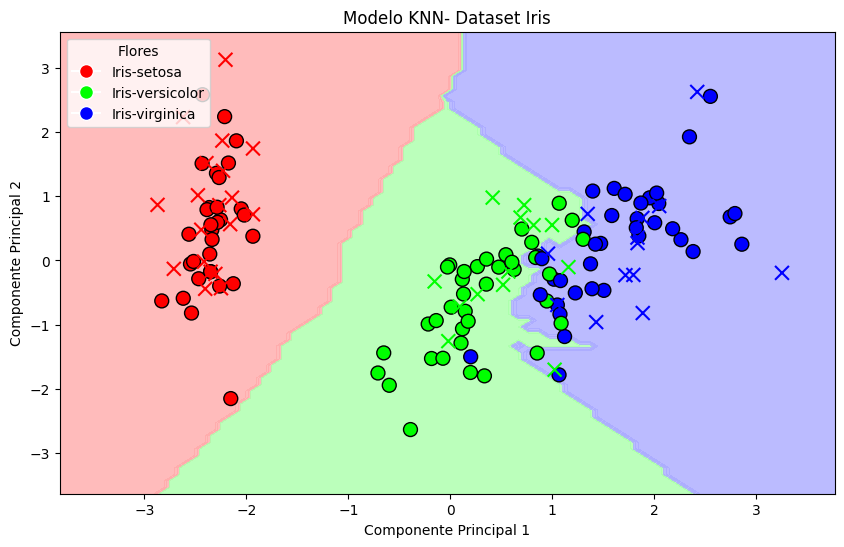

X = Dados de teste e O = Dados de Treino


In [265]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np

flower_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

# Aplicar PCA para reduzir as features para apenas 2 dimensões (para ser visualizavel por seres humanos)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Ajustando o KNN com os dados em 2D (PCA)
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Criando malha de pontos para desenhar fronteiras de decisão
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prevendo classes para cada ponto na malha
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Definindo cores para o gráfico
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plotar as fronteiras de decisão
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plotar os pontos de treino e teste
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=100, label='Treinamento')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=100, marker='x', label='Teste')

# Adicionando a legenda personalizada
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap_bold.colors[i], markersize=10, label=flower_names[i])
           for i in range(3)]

plt.legend(handles=handles, title="Flores", loc='upper left')

# Título e eixos
plt.title("Modelo KNN- Dataset Iris")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Mostrar o gráfico
plt.show()
print("X = Dados de teste e O = Dados de Treino")

## Explicabilidade dos dados do modelo

Observar a variância das features e sua importância é crucial para entender como os dados se separam e quais variáveis influenciam essa separação.
<br>A variância indica a quantidade de informação que uma feature traz para o modelo; quanto maior a variância, mais relevante ela pode ser para capturar padrões nos dados.

<br>Analisar as features mais importantes permite identificar quais variáveis contribuem significativamente para a classificação ou regressão, auxiliando na interpretação do modelo. Isso, por sua vez, pode ajudar na otimização do desempenho, simplificando o modelo e focando nas características que realmente importam.

In [271]:
# Criando um DataFrame para visualizar a variância dos dados
explained_variance = pca.explained_variance_ratio_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(pca.components_).sum(axis=0)
})

# Ordenando por importância
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Imprimindo as features mais importantes
print("Importância das Features:")
print(feature_importance)

# Calcular a importância das características
total_importance = feature_importance['Importance'].sum()
feature_importance['Importance (%)'] = (feature_importance['Importance'] / total_importance) * 100

# Ordenando por importância em porcentagem
feature_importance = feature_importance.sort_values(by='Importance (%)', ascending=False)

# Imprimindo as features mais importantes em porcentagem
print("\nImportância das Features em Porcentagem:")
print(feature_importance[['Feature', 'Importance (%)']])

Importância das Features:
         Feature  Importance
1   SepalWidthCm    1.138881
0  SepalLengthCm    0.852186
3   PetalWidthCm    0.607859
2  PetalLengthCm    0.605408

Importância das Features em Porcentagem:
         Feature  Importance (%)
1   SepalWidthCm       35.541888
0  SepalLengthCm       26.594793
3   PetalWidthCm       18.969898
2  PetalLengthCm       18.893421


## Agora é com você!

Experimente, alterar alguns parametro como:
<br><br>**Número de Vizinhos (n_neighbors)**
<br>Este parâmetro determina quantos vizinhos mais próximos o modelo considerará ao fazer uma previsão. Um valor baixo (como 1 ou 3) pode tornar o modelo mais suscetível a ruídos nos dados, enquanto um valor mais alto pode resultar em uma decisão mais suave, mas menos sensível às variações locais.
Exemplo de Alteração: knn = KNeighborsClassifier(n_neighbors=5)
<br><br>**Método de Distância (metric)**
<br>O método utilizado para calcular a distância entre os pontos. O padrão é a distância Euclidiana, mas você pode usar outras métricas, como Manhattan, Minkowski, ou Hamming, dependendo da natureza dos dados.
Exemplo de Alteração: knn = KNeighborsClassifier(metric='manhattan')
<br><br>**Peso dos Vizinhos (weights)**
<br>Este parâmetro define como os vizinhos são ponderados na decisão final. Se uniform (padrão), todos os vizinhos têm o mesmo peso. Se distance, vizinhos mais próximos têm maior influência.
Exemplo de Alteração: knn = KNeighborsClassifier(weights='distance')
<br><br>**Tamanho do Conjunto de Treinamento (test_size)**
<br>Ao dividir os dados em conjuntos de treinamento e teste, você pode alterar a proporção do conjunto de dados que é usada para treinamento e teste, influenciando a avaliação do modelo.
Exemplo de Alteração: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
<br><br>**Semente Aleatória (random_state)**
<br>Este parâmetro é utilizado em métodos de divisão de dados, como train_test_split. Ao definir um valor específico, você garante que as divisões dos dados sejam reproduzíveis.
O conjunto de dados utilizado pode impactar o resultado do modelo.
Exemplo de Alteração: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)